# Ford GoBike System Data
## by Alex Kim

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob as glob
import datetime

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
#creating the df
df_2017 = pd.read_csv('../data/2017-fordgobike-tripdata.csv')

In [3]:
#verifying dataframe created properly
df_2017.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [4]:
df_2017.end_station_id.isna().sum()

0

In [5]:
#for all of the 2018 data files, I used the for loop below to combine and concatenate all files into one dataframe.
path = '../data/2018'
allFiles = glob.glob(path + "/*.csv")

list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)

df_2018 = pd.concat(list_, axis = 0, ignore_index = True)


In [6]:
#verifying that the dataframe is creates properly
df_2018.sample(500)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1443568,323,2018-10-28 13:48:18.0210,2018-10-28 13:53:41.1700,141.0,Valencia St at Cesar Chavez St,37.747998,-122.420219,121.0,Mission Playground,37.759210,-122.421339,1757,Subscriber,1965.0,Male,No
100328,539,2018-02-02 10:35:35.7870,2018-02-02 10:44:35.2990,147.0,29th St at Tiffany Ave,37.744067,-122.421472,97.0,14th St at Mission St,37.768265,-122.420110,3192,Subscriber,1982.0,Male,No
853039,969,2018-12-17 20:25:17.9050,2018-12-17 20:41:27.3160,55.0,Webster St at Grove St,37.777053,-122.429558,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5293,Subscriber,1993.0,Male,No
1589118,506,2018-10-05 09:16:57.4200,2018-10-05 09:25:23.9050,317.0,San Salvador St at 9th St,37.333955,-121.877349,296.0,5th St at Virginia St,37.325998,-121.877120,534,Subscriber,2000.0,Male,Yes
1395003,1185,2018-08-04 19:16:02.2380,2018-08-04 19:35:48.1820,16.0,Steuart St at Market St,37.794130,-122.394430,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2645,Customer,1997.0,Female,No
297733,863,2018-09-21 16:50:45.6190,2018-09-21 17:05:08.8910,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,98.0,Valencia St at 16th St,37.765052,-122.421866,4317,Subscriber,1989.0,Female,No
1099892,1039,2018-07-20 18:00:33.1930,2018-07-20 18:17:52.3330,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,50.0,2nd St at Townsend St,37.780526,-122.390288,1111,Customer,NaN,NaN,No
32746,446,2018-02-19 19:52:01.3080,2018-02-19 19:59:27.8970,180.0,Telegraph Ave at 23rd St,37.812678,-122.268773,212.0,Mosswood Park,37.824931,-122.260479,1970,Subscriber,1980.0,Other,No
827496,144,2018-12-22 10:56:48.3370,2018-12-22 10:59:12.7580,316.0,San Salvador St at 1st St,37.330165,-121.885831,294.0,Pierce Ave at Market St,37.327581,-121.884559,3852,Subscriber,1993.0,Male,Yes
785374,889,2018-05-03 15:17:08.1700,2018-05-03 15:31:58.0970,97.0,14th St at Mission St,37.768265,-122.420110,50.0,2nd St at Townsend St,37.780526,-122.390288,3364,Customer,NaN,NaN,No


In [7]:
#merge the 2017 dataset with the combined 2018 dataset
df = df_2017.append(df_2018, ignore_index=True)

/Users/ajkim/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [8]:
#verify the data is loading properly
df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,Customer
1,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,Customer
2,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.8830,NaN,NaN,245.0,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.4110,Customer
3,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.5310,NaN,NaN,60.0,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.6360,Customer
4,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,Subscriber


In [11]:
#check all of the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383421 entries, 0 to 2383420
Data columns (total 16 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(7), int64(2), object(7)
memory usage: 290.9+ MB


In [14]:
#convert all of the data to their correct types
df.end_time = pd.to_datetime(df.end_time)
df.start_time = pd.to_datetime(df.start_time)
df.member_gender = df.member_gender.astype('category')
df.user_type = df.user_type.astype('category')
pd.set_option('precision', 0)

In [13]:
#verify the datatypes changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383421 entries, 0 to 2383420
Data columns (total 16 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
member_birth_year          float64
member_gender              category
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
dtypes: category(2), datetime64[ns](2), float64(7), int64(2), object(3)
memory usage: 259.1+ MB


In [14]:
#identify the new dataframe column numbers and row count
df.shape

(2383421, 16)

In [15]:
#number of unique bicycles
df.bike_id.nunique()

5404

In [12]:
#create an age variable in the dataframe
df['age'] = 2019-df.member_birth_year
#create bings for age groups
df['member_age_bins'] = df['age'].apply(lambda x: '10 - 17' if 10<x<=17
                                        else '18 - 25' if 18<x<=26
                                        else '26 - 35' if 26<x<=36
                                        else '36 - 49' if 36<x<=49
                                        else '50 >' if x>=50
                                        else x)

In [17]:
#number of unique birth years
df.member_birth_year.nunique()

88

In [18]:
#number of rows where the end station is null
df.end_station_id.isna().sum()

11771

In [15]:
#get the date from start time
df['start_time_date']=df['start_time'].dt.date
df['end_time_date']=df['end_time'].dt.date
#get the start time month and year
df['start_time_year_month']=df['start_time'].map(lambda x: x.strftime('%Y-%m'))
df['end_time_year_month']=df['end_time'].map(lambda x: x.strftime('%Y-%m'))

In [60]:
#calculate duration in minutes
df['duration_min']=df['duration_sec']/60

### What is the structure of your dataset?

> There are 16 columns and 2,383,421 rows in the merged data file for 2017 and 2018 data for bike rental information. There are only 5,404 unique bike_ids in the dataset. There are a couple of categories for user_type and member_gender

### What is/are the main feature(s) of interest in your dataset?

> The main features I'm interested in are start time and end time to calculate when the most trips were taken, duration to calculate how long a trip takes, and whether or not subscribers versus customers make a difference.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Start time, end time, duration, and user type.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

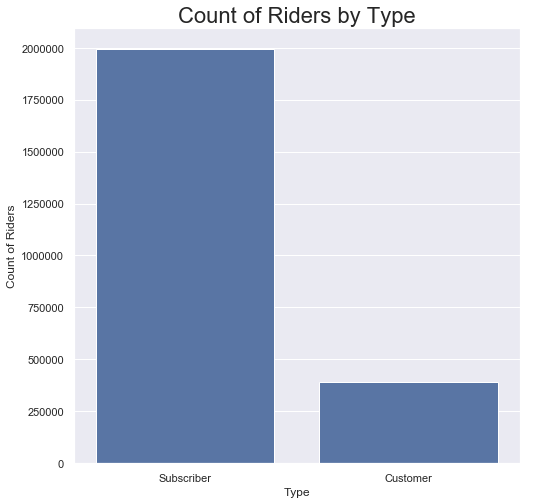

In [37]:
type_counts = df.user_type.value_counts()
type_order = type_counts.index
base = sb.color_palette()[0]
#increased the figure size
sb.set(rc={'figure.figsize':(8,8)})
sb.countplot(data=df, x='user_type', order=type_order,color=base)
plt.title('Count of Riders by Type',fontsize=20);
#create the axis labels
plt.xlabel('Type');
plt.ylabel('Count of Riders');

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

In [20]:
#noticed some discrepancies with age as there were some over 100 year olds
df.age.describe()

count    2e+06
mean     4e+01
std      1e+01
min      2e+01
25%      3e+01
50%      3e+01
75%      4e+01
max      1e+02
Name: age, dtype: float64

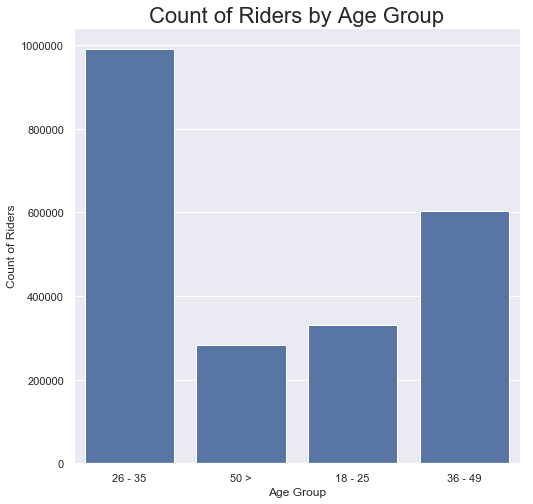

In [35]:
#used a subset of the data for people under 90 years of age
age_counts = df.query('age<=90').age.value_counts()
#increased the figure size
sb.set(rc={'figure.figsize':(8,8)})
#create the plot
sb.countplot(data=df, x='member_age_bins', color=base)
#create the axis labels
plt.xlabel('Age Group');
plt.ylabel('Count of Riders');
plt.title('Count of Riders by Age Group',fontsize=20);

In [42]:
#converting the counts into proportions
n_age = df.age.notna().sum()
max_age_counts = age_counts.max()
max_prop = max_age_counts/n_age
max_prop

0.05731492066312446

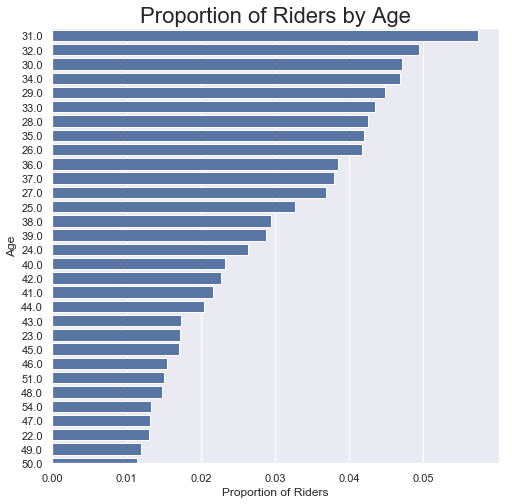

In [53]:
#create new tick marks
tick_props=np.arange(0, max_prop, 0.01)
tick_names=['{:0.02f}'.format(v) for v in tick_props]
plt.xticks(tick_props * n_age, tick_names)
type_order = age_counts.index
#create the plot
sb.countplot(data=df, y='age', order=type_order,color=base)
#create the axis labels
plt.xlabel('Proportion of Riders');
plt.ylabel('Age');
plt.ylim(30)
plt.title('Proportion of Riders by Age',fontsize=20);

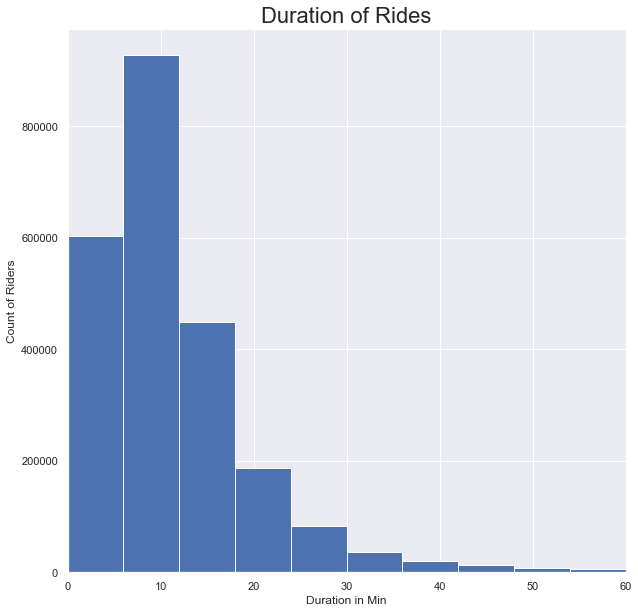

In [64]:
#updating the figure size
sb.set(rc={'figure.figsize':(10,10)})
#creating bins
bins = np.arange(0,df['duration_min'].max()+6, 6)
#plotting the data
plt.hist(data=df, x='duration_min', bins = bins)
#setting the x limits
plt.xlim(0,60);
#create the axis labels
plt.xlabel('Duration in Min');
plt.ylabel('Count of Riders');
plt.title('Duration of Rides',fontsize=20);

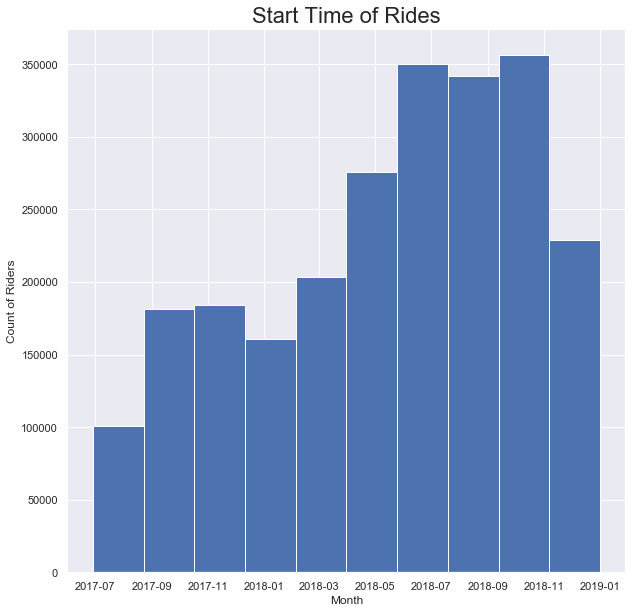

In [57]:
#set the figure size
sb.set(rc={'figure.figsize':(10,10)})
#plot a histogram
plt.hist(data=df, x='start_time');
#label the axis
plt.xlabel('Month');
plt.ylabel('Count of Riders');
plt.title('Start Time of Rides',fontsize=20);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I transformed the duration in seconds to a logarithmic scale as there was a large distribution from low to high numbers making it difficult to read the graph. By transforming it, I was able to easily depict how long most rentals were being used (between 5 - 18 minutes). 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I first calculated the age by using the member birth year and then stored it on the dataframe. There seemed to have been ages that were incorrect as there were some ages well beyond 100 years olds (max was 138). Therefore, I filtered out the ages that were over 90 as it seemed highly unlikely that they would be renting these bicycles.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

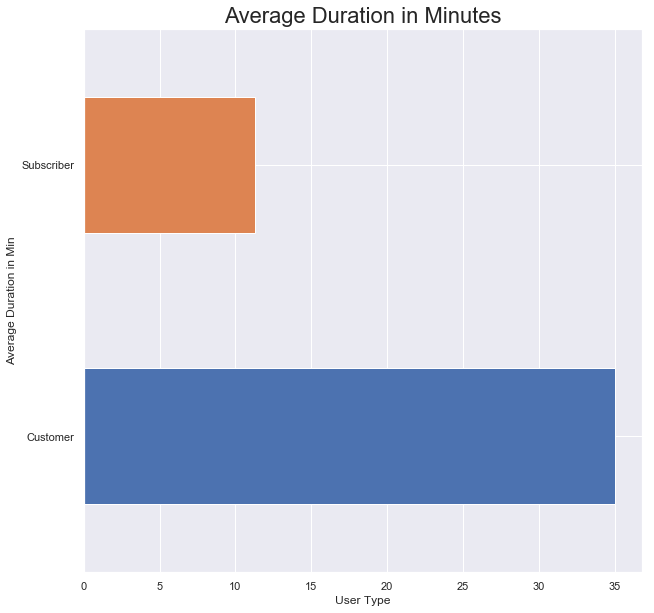

In [76]:
#plot the duration based on ride_month
df.groupby('user_type')['duration_min'].mean().plot(kind='barh')
#create the axis labels
plt.xlabel('User Type');
plt.ylabel('Average Duration in Min');
plt.title('Average Duration in Minutes',fontsize=20);

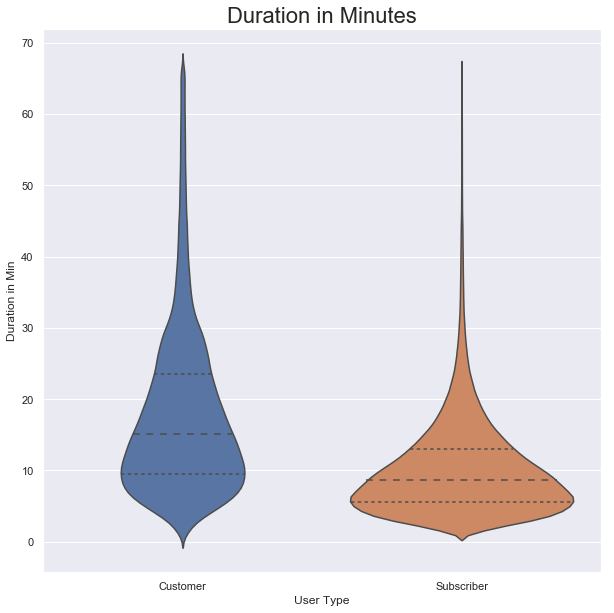

In [78]:
#create a subset of the data
df_sub = df.query('duration_sec < 4000')
#set the base color
base_color=sb.color_palette()[0]
#create a violin plot based on user and duration
sb.violinplot(data=df_sub, x='user_type',y='duration_min', inner='quartile')
#create the axis labels
plt.xlabel('User Type');
plt.ylabel('Duration in Min');
plt.title('Duration in Minutes',fontsize=20);

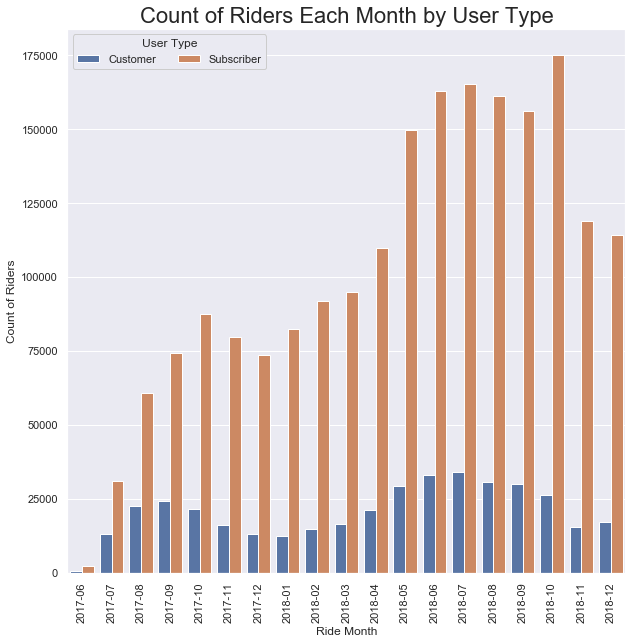

In [84]:
#create a histogram based on ride month and user type
sb.countplot(data = df.sort_values(by=['start_time_year_month']), x = 'start_time_year_month', hue = 'user_type')
#create the legend
plt.legend(loc = 2, ncol = 2, framealpha = 1, title = 'User Type')
#create the axis labels
plt.xlabel('Ride Month');
plt.ylabel('Count of Riders');
plt.title('Count of Riders Each Month by User Type',fontsize=20);
plt.xticks(rotation=90);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Customers are taking longer rides than subscribers but subscribers are taking a lot more rides. The peak months for both customers and subscribers are in September and October.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Subscription growth year over year has increased substantially. Where customer count has stayed relactively the same year over year.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

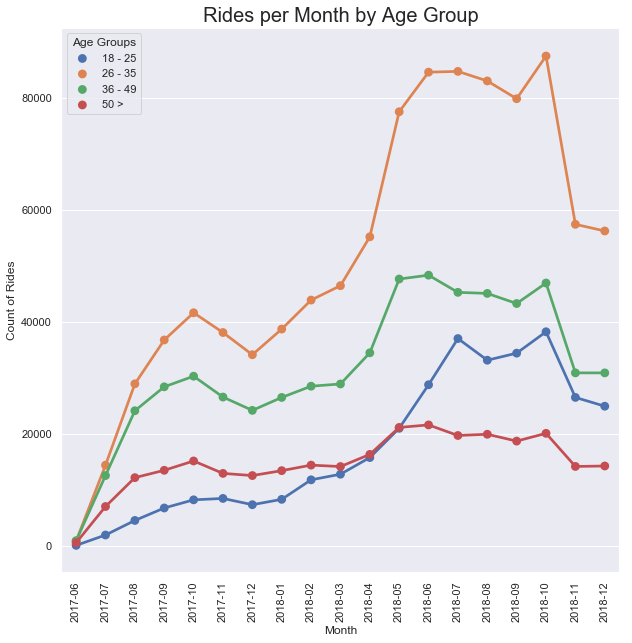

In [94]:
#create a new dataframe grouped by month and member age bins then get the aggregate of bike rides
df_age = df.groupby(['start_time_year_month', 'member_age_bins']).agg({'bike_id':'count'}).reset_index()
#change the figure size
plt.figure(figsize=(10,10))
#plot the graph
sb.pointplot(x='start_time_year_month', y='bike_id', hue='member_age_bins',  data=df_age.sort_values(by=['start_time_year_month']))
#create title and labels
plt.title('Rides per Month by Age Group', fontsize=20)
plt.xlabel('Month');
plt.legend(title='Age Groups')
plt.ylabel('Count of Rides');
plt.xticks(rotation=90);

/Users/ajkim/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/ajkim/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/ajkim/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


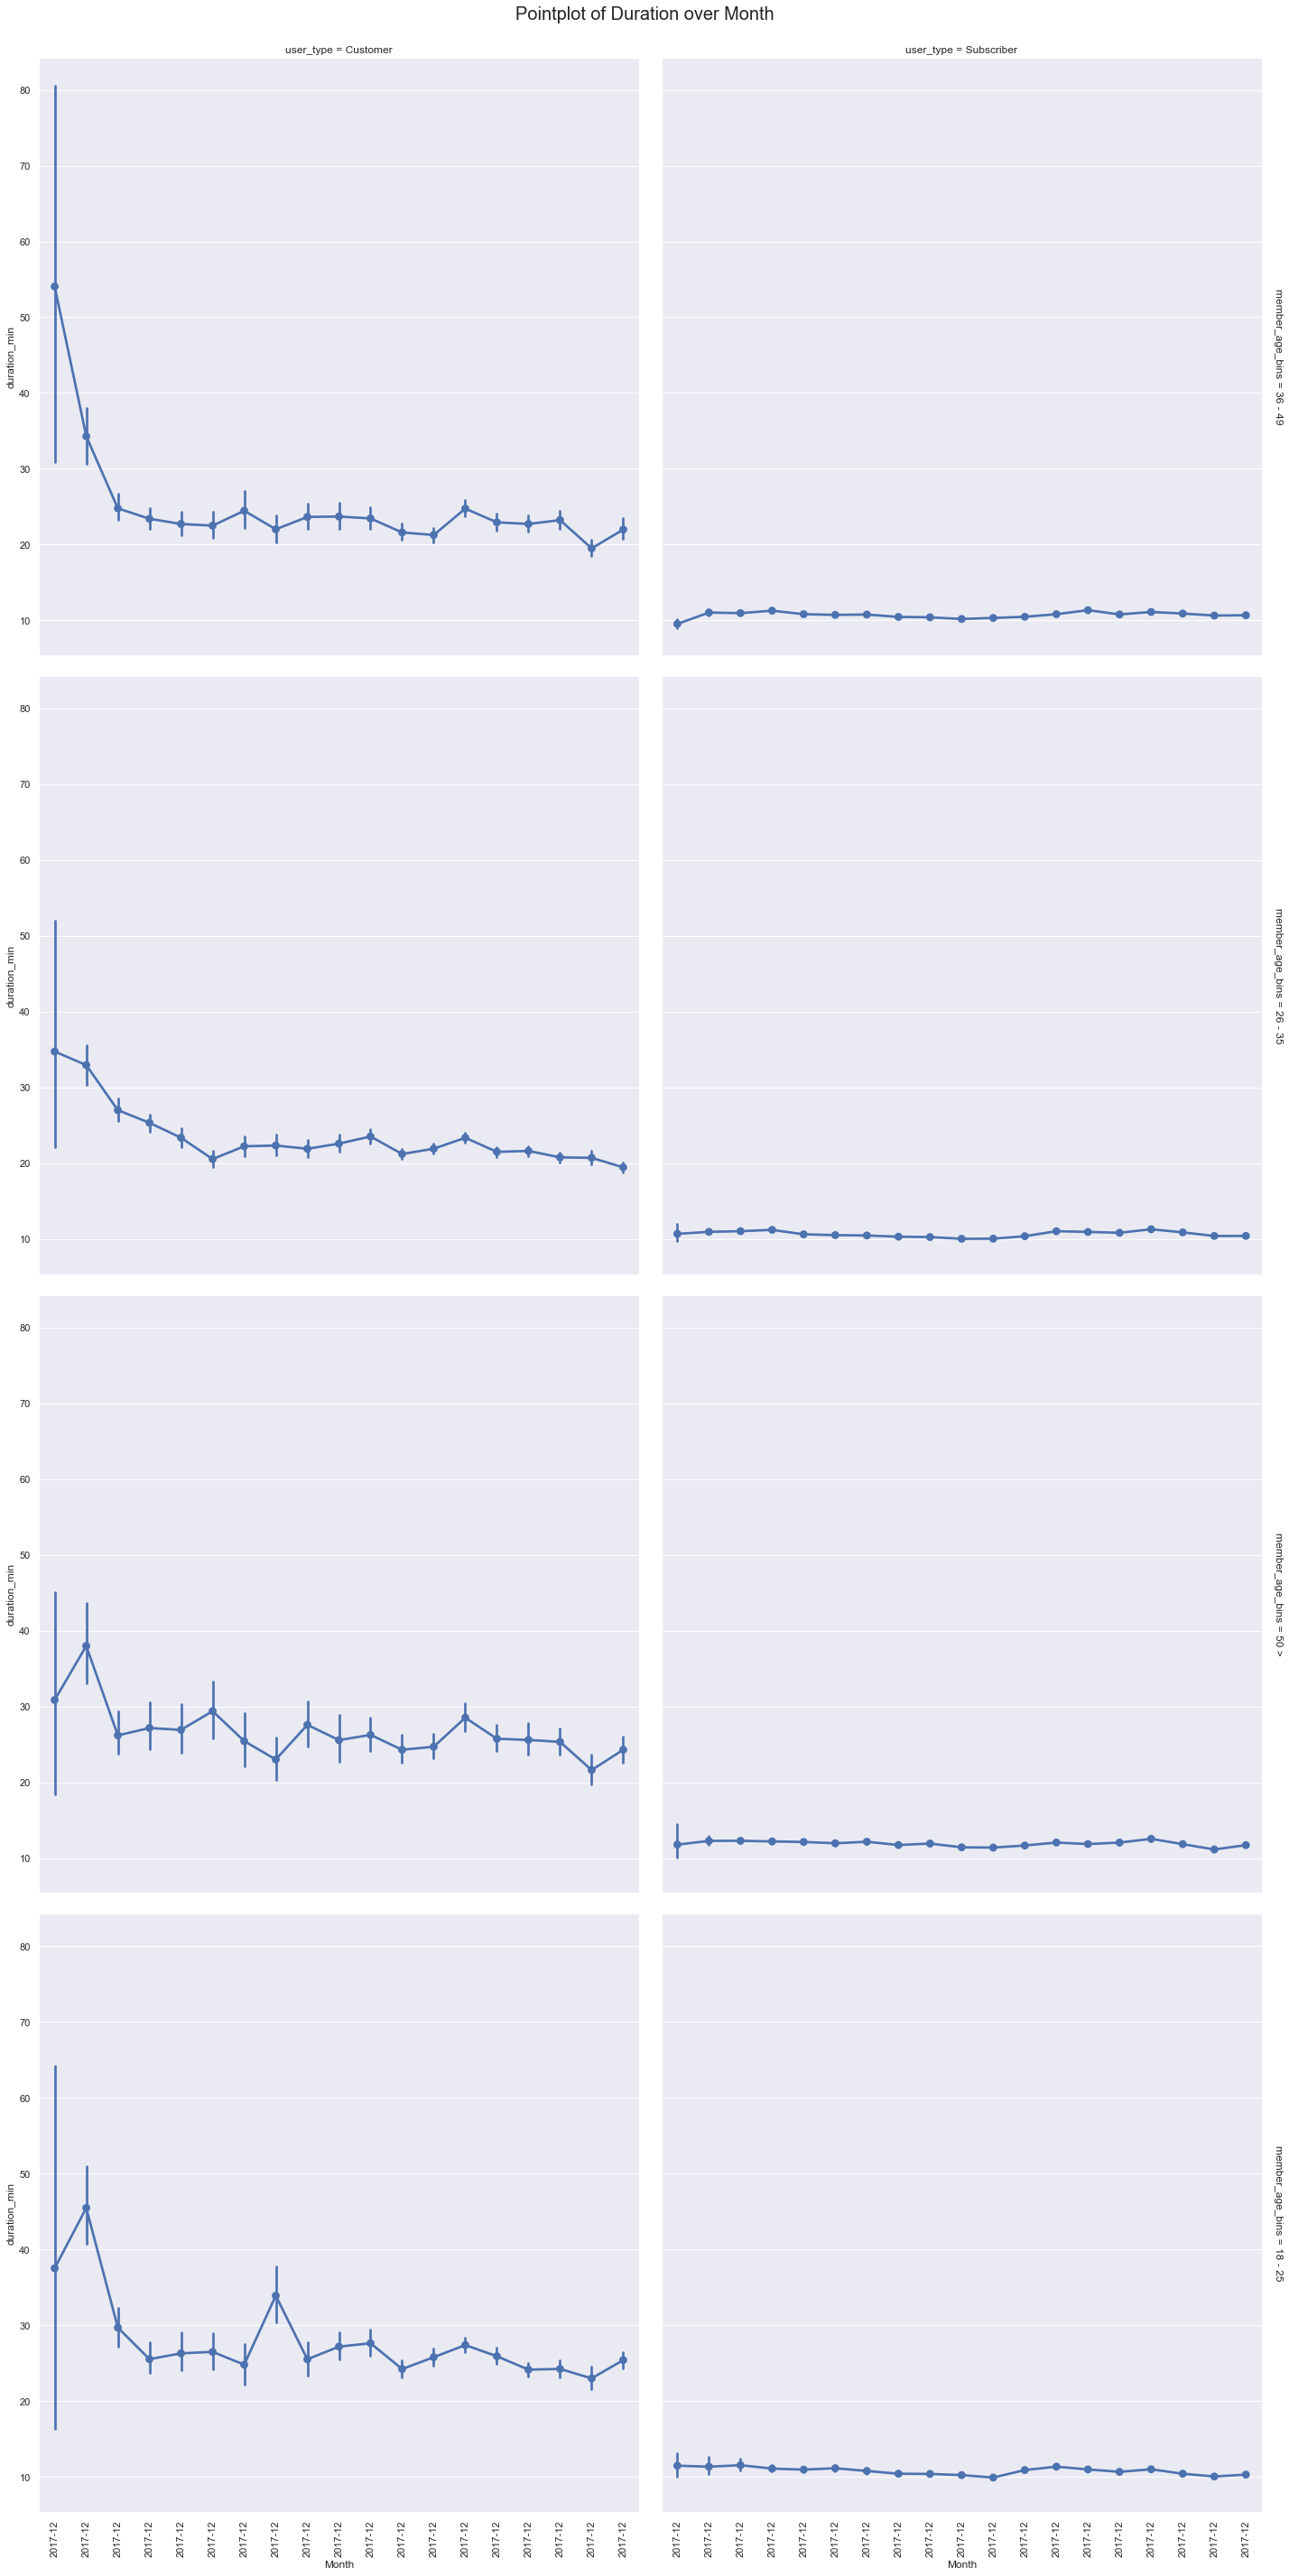

In [156]:
#create a subset of the data
df_subset = df.query('duration_sec < 40000')
#create a two facet grid for customer and subscriber
g = sb.FacetGrid(data = df_subset.sort_values(by=['start_time_year_month']), col = 'user_type', row='member_age_bins', size = 10, margin_titles=True)
#use a point plot
g.map(sb.pointplot, 'start_time_year_month','duration_min')
#create the axis labels
plt.subplots_adjust(top=0.96)
g.fig.suptitle('Pointplot of Duration over Month', size=20)
#set the axis labels and rotate the x ticks marks so it displays better
g.axes[3,0].set_xlabel('Month');
g.axes[3,1].set_xlabel('Month');
g.axes[3,0].set_xticklabels(df_subset.start_time_year_month,rotation=90);
g.axes[3,1].set_xticklabels(df_subset.start_time_year_month,rotation=90);


/Users/ajkim/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


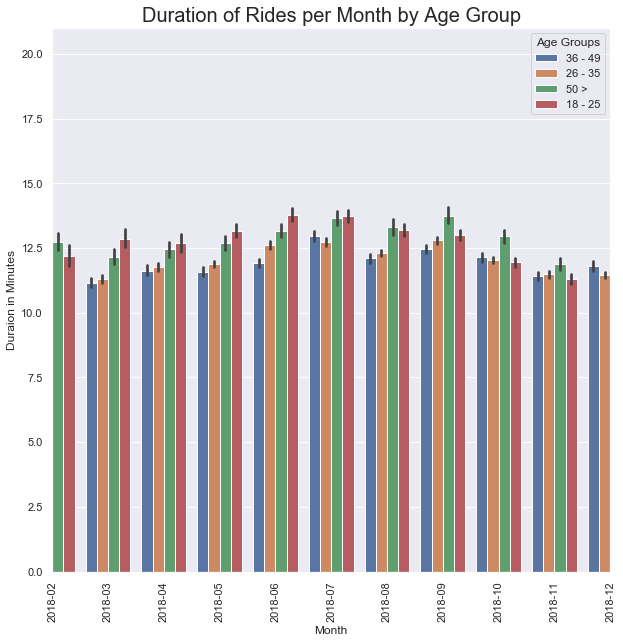

In [129]:
#plot the barchart for month, duration, and member age groups
sb.barplot(data=df_subset.sort_values(by=['start_time_year_month']),
           x='start_time_year_month', 
           y='duration_min',
           hue='member_age_bins')
#limit to last 10 months and only 20 minute durations
plt.xlim(8,18);
plt.ylim(0,21);
#create title and labels
plt.title('Duration of Rides per Month by Age Group', fontsize=20)
plt.xlabel('Month');
plt.legend(title='Age Groups')
plt.ylabel('Duraion in Minutes');
plt.xticks(rotation=90);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Longest rides came from customers and seemed to be more centralized during summer months when it gets really hot. 26-35 year olds used the bikes more than any other age group. There was a significant drop off of rides taken after October for all age groups. Based on the pointplot, no matter what the age group, all of the subscribers seemed to be taking shorter rides. The younger age groups only for customers took longer rides.

### Were there any interesting or surprising interactions between features?

> The subscriber duration seemed pretty consistent throughout the year with slightly higher numbers during the summer. The 36-49 age group had more rides than the 18-25 year old age group. The duration of the people over 50 years old were amongst the highest out of all age groups. 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!